In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks

In [4]:
X, Y = datasets.load_iris(return_X_y=True)

In [5]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing

In [6]:
pca = decomposition.PCA(2)
pca.fit(X)
U = pca.transform(X)

In [7]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]

In [8]:
Y2[Y2 == 1] = -1
Y2[Y2 == 2] = +1

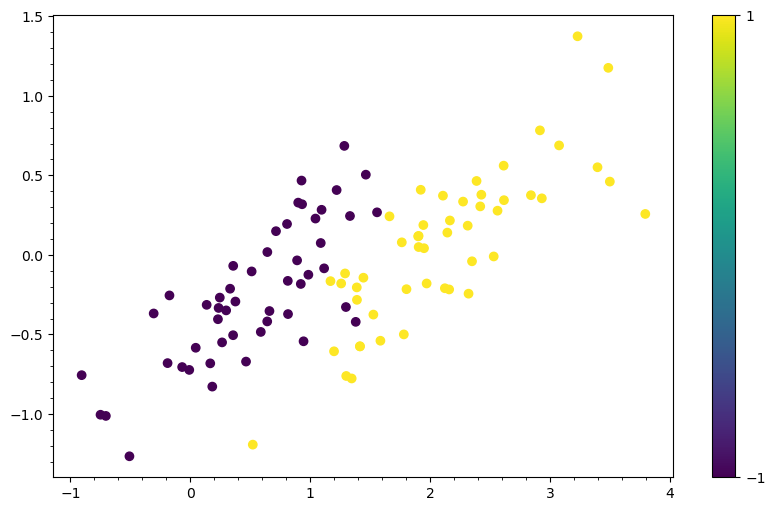

In [9]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [78]:
def calc_zz(mod, min_xval, max_xval, min_yval, max_yval):
    xrange = np.linspace(min_xval, max_xval, 150)
    yrange = np.linspace(min_yval, max_yval, 150)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate(XY)
    ZZ = ZZ.reshape(XX.shape)
    return XX, YY, ZZ

In [111]:
hinge_func2 = funcs.Hinge(1.0)
loss_func2 = lossfuncs.MarginLoss(hinge_func2)
nnmod2 = models.SimpleNN(funcs.Sigmoidal(5.0), 2, 10)
risk2 = risks.Risk(nnmod2, loss_func2)

nnmod2.param[:] = 2*np.random.random(nnmod2.n_param)-1

In [112]:
gd2 = gda.GradientDescent(risk2, h=0.05, tol=1.0e-8, n_iter=3000)

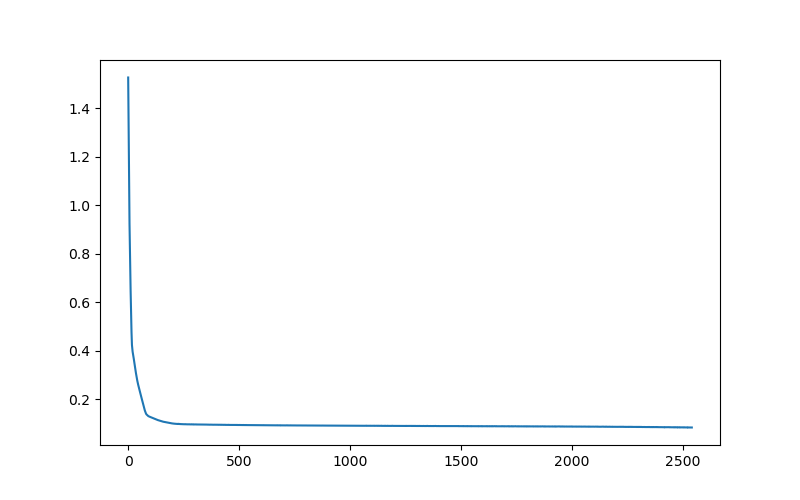

In [113]:
plt.figure(figsize=(8,5))
gd2.fit(U2, Y2)
plt.plot(gd2.rvals)
plt.show()

In [114]:
accuracy_score(Y2, np.sign(nnmod2.evaluate(U2)))

0.96

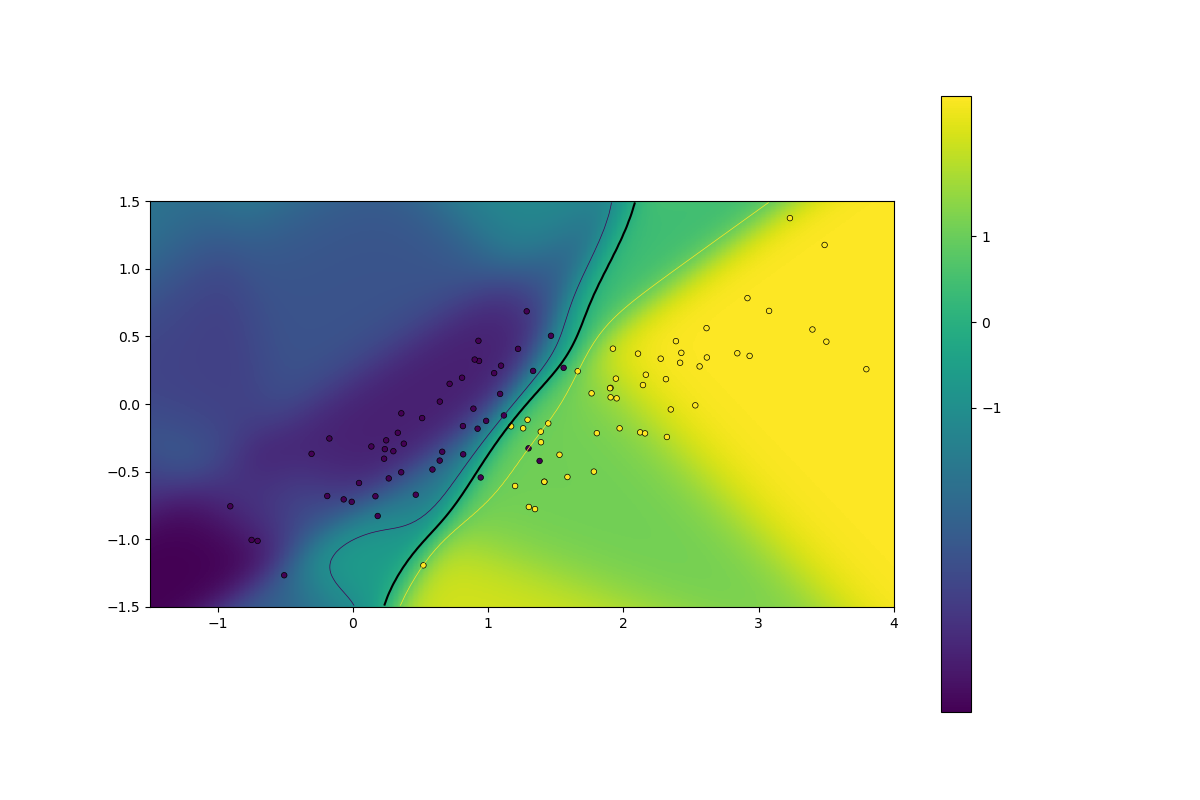

In [115]:
XX, YY, ZZ = calc_zz(nnmod2, -1.5, 4.0, -1.5, 1.5)
plt.figure(figsize=(12,8))
plt.scatter(U2[:,0], U2[:,1], c=Y2, s=16, edgecolors='k', linewidths=0.50)
cs = plt.imshow(ZZ, origin='lower', extent=(-1.5, 4.0, -1.5, 1.5))
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[-1.,0.,1.], origin='lower', linewidths=0.5, extent=(-1.5, 4.0, -1.5, 1.5))
plt.contour(ZZ, levels=[0.], origin='lower', colors='k', extent=(-1.5, 4.0, -1.5, 1.5))
plt.show()

/tmp/ipykernel_15790/2392813696.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')


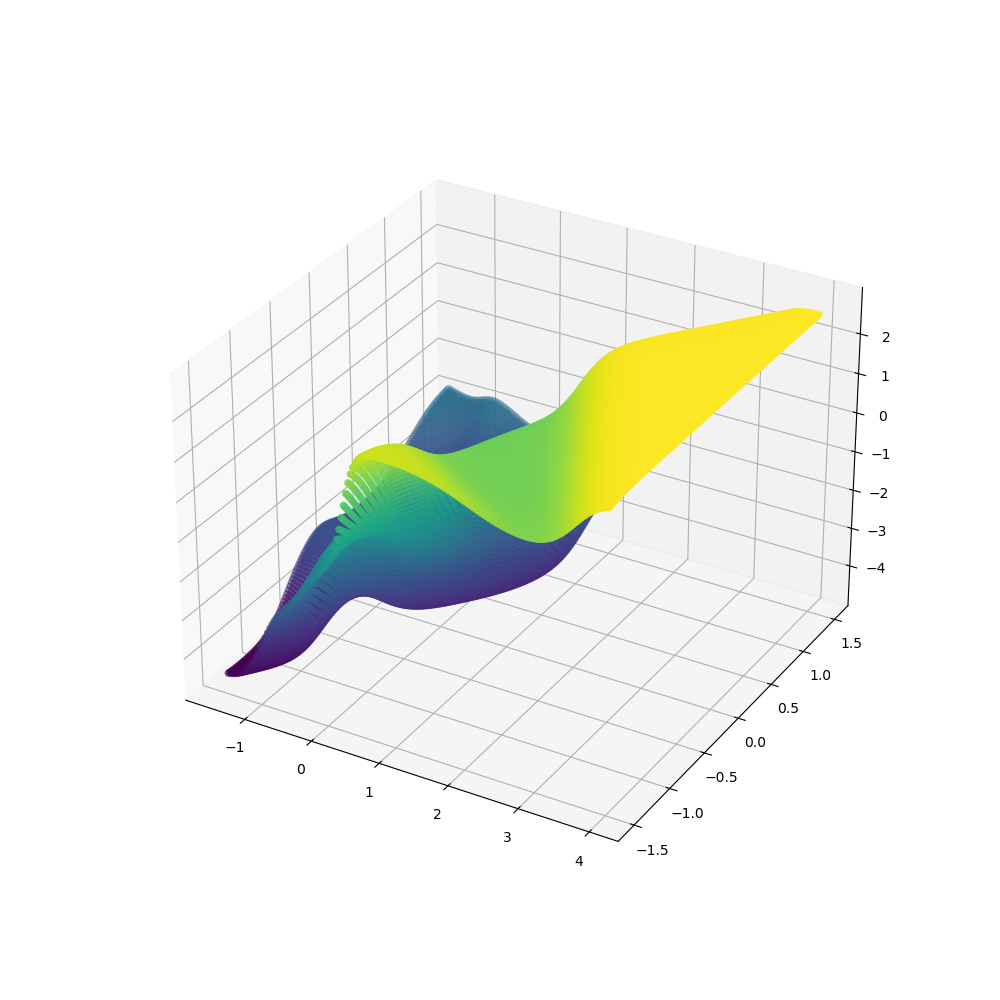

In [119]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter(XX, YY, ZZ, c=ZZ, zdir='z')
ax.contour(XX, YY, ZZ, colors='k', levels=[0], linewidths=2.0)
plt.show()

In [106]:
from mltools.plots import plot_cls_function

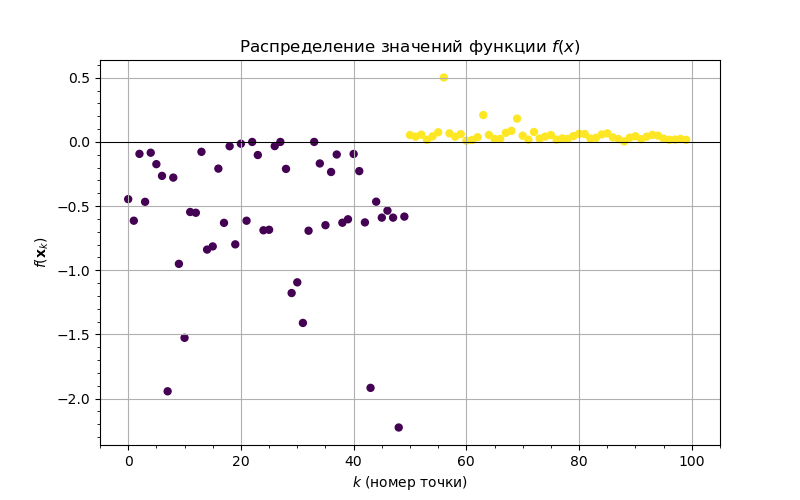

In [107]:
plt.figure(figsize=(8,5))
plot_cls_function(nnmod2, U2, Y2)
plt.show()

In [2]:
a=np.arange(100, dtype="d")

In [4]:
b = a[10:20]